<a href="https://colab.research.google.com/github/LiyaAg/Python-Basics-/blob/main/Logisitic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files=files.upload()

Saving titanic.csv to titanic (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
dataset=pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
count=len(dataset)
print(count)

891


In [ ]:
#Data Pre Processing
#Checking for missing values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#computation of missing values
print('Median of Age column: %.2f' %(dataset["Age"].median(skipna=True)))
print('Percent of missing records in Cabin Column: %2f %%' %((dataset['Cabin'].isnull().sum()/len(dataset))*100))
print('Most common port of embarkment: %s'%(dataset["Embarked"].value_counts().idxmax()))

Median of Age column: 28.00
Percent of missing records in Cabin Column: 77.104377 %
Most common port of embarkment: S


In [ ]:
dataset["Age"].fillna(dataset["Age"].median(skipna=True),inplace=True)
dataset["Embarked"].fillna(dataset['Embarked'].value_counts().idxmax(),inplace=True)
dataset.drop('Cabin',axis=1,inplace=True)

In [ ]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
dataset.drop('PassengerId',axis=1, inplace=True)
dataset.drop('Name',axis=1, inplace=True)
dataset.drop('Ticket',axis=1, inplace= True)

In [ ]:
dataset['TravelAlone']=np.where((dataset["SibSp"]+dataset["Parch"])>0, 0,1)
dataset.drop("SibSp",axis=1, inplace=True)
dataset.drop('Parch',axis=1, inplace=True)

In [ ]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [ ]:
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   TravelAlone  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


3    491
1    216
2    184
Name: Pclass, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


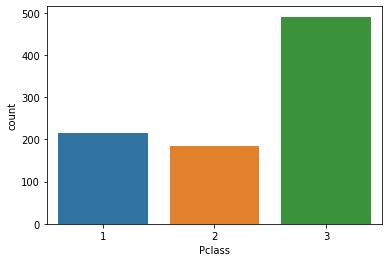

In [ ]:
#count of passengers based on Pclass
sns.countplot('Pclass',data=dataset)
print(dataset['Pclass'].value_counts())

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


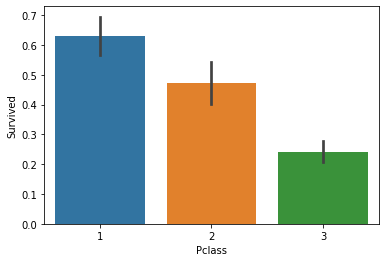

In [ ]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      577
female    314
Name: Sex, dtype: int64

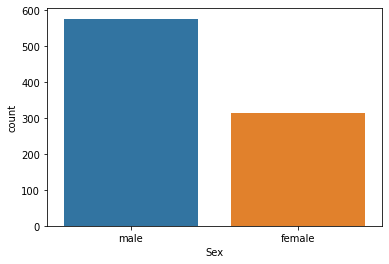

In [ ]:
#count of passengers based on gender
sns.countplot('Sex',data=dataset)
dataset['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


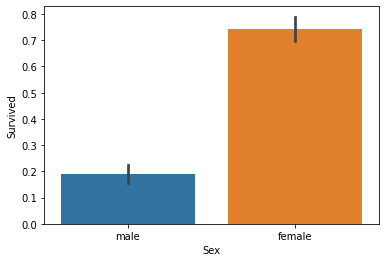

In [ ]:
#effect of sex feature on the survival rate 
sns.barplot(x='Sex',y='Survived',data=dataset)
dataset.groupby('Sex',as_index=False).Survived.mean()

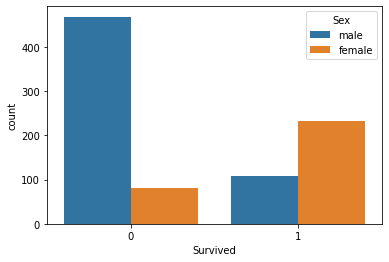

In [ ]:
#countplot of male and female on the basis of survival
sns.countplot(x= 'Survived', hue='Sex', data=dataset)

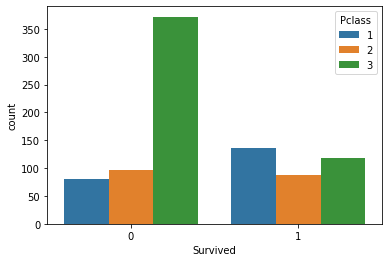

In [ ]:
#countplot of Pclass the basis of survival
sns.countplot(x= 'Survived', hue='Pclass', data=dataset)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


S    646
C    168
Q     77
Name: Embarked, dtype: int64

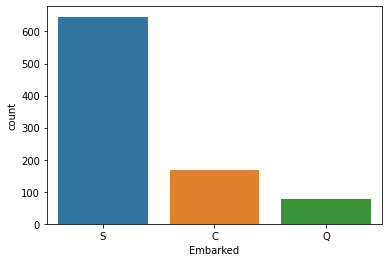

In [ ]:
#countplot on the basis of Embarkement
sns.countplot('Embarked',data=dataset)
dataset['Embarked'].value_counts()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


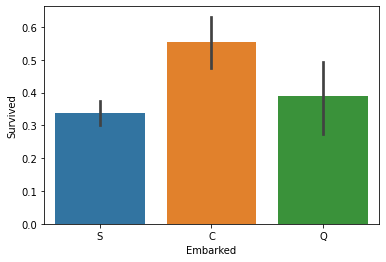

In [ ]:
#embarked and rate of embarked
sns.barplot(x='Embarked',y='Survived',data=dataset)
dataset.groupby('Embarked',as_index=False).Survived.mean()

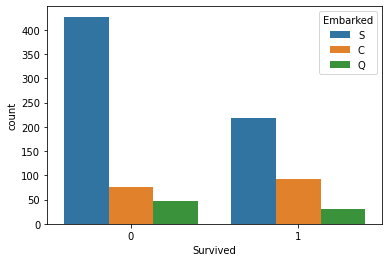

In [ ]:
sns.countplot(x= 'Survived', hue='Embarked', data=dataset)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    537
0    354
Name: TravelAlone, dtype: int64

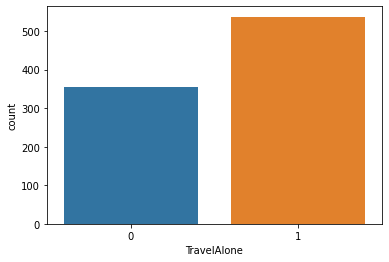

In [ ]:
sns.countplot('TravelAlone',data=dataset)
dataset['TravelAlone'].value_counts()

,TravelAlone,Survived
0,0,0.505650
1,1,0.303538


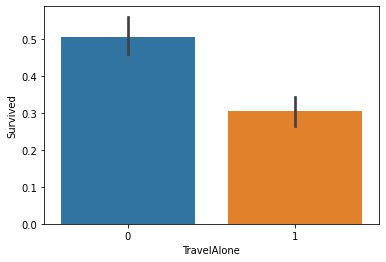

In [ ]:
sns.barplot(x='TravelAlone',y='Survived',data=dataset)
dataset.groupby('TravelAlone',as_index=False).Survived.mean()

In [ ]:
#model creation
#import label encoder
from sklearn import preprocessing

In [ ]:
#label_encoder object knows how to understand word labels 
label_encoder= preprocessing.LabelEncoder()


In [ ]:
#Encode labels in Sex and Embarked
dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked']= label_encoder.fit_transform(dataset['Embarked'])



In [ ]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1


In [ ]:
#setting the values for dependent and independent variables
x= dataset.drop('Survived', 1)
y= dataset.Survived

<ipython-input-45-84a8ced5d6ac>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x= dataset.drop('Survived', 1)


In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =2 )


In [ ]:
#fitting the logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred =lr_model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0])

In [ ]:
#Accuracy of the model
from sklearn.metrics import accuracy_score
print('Accuracy of the model: ',(accuracy_score(y_test, y_pred)*100))

Accuracy of the model:  78.73134328358209


In [ ]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
a.head()

,Actual value,Predicted value
707,1,0
37,0,0
615,1,1
169,0,0
68,1,1


<function classification_report at 0x7fe989226e50> [0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0]


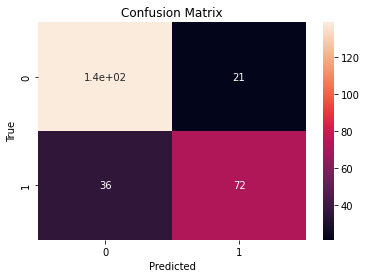

In [ ]:
#confusion matrix and classification report 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 

matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True,)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report,y_pred)
